# Data Processing

### Import Liraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

### Import Dataset

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
test_set = dataset_test.iloc[:, 1:2].values

### Feature Scaling

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Create a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []

for i in range(60, training_set.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the RNN

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
regressor = Sequential()

In [9]:
# First LSTM Layer
regressor.add(LSTM(units = 50,
                   return_sequences = True,
                   input_shape = (X_train.shape[1], 1)))

# Dropout
regressor.add(Dropout(rate=0.2))

In [10]:
# Second LSTM Layer
regressor.add(LSTM(units = 50,
                   return_sequences = True))

# Dropout
regressor.add(Dropout(rate=0.2))

In [11]:
# Third LSTM Layer
regressor.add(LSTM(units = 50,
                   return_sequences = True))

# Dropout
regressor.add(Dropout(rate=0.2))

In [12]:
# Fourth LSTM Layer
regressor.add(LSTM(units = 50))

# Dropout
regressor.add(Dropout(rate=0.2))

In [13]:
# Output Layer
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'MSE')

# Training

In [15]:
regressor.fit(x = X_train,
              y = y_train,
              epochs = 100,
              batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0535
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0065
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0056
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - lo

# Prediction

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [17]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [18]:
inputs = inputs.reshape(-1,1)

In [19]:
inputs = sc.transform(inputs)

In [20]:
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [21]:
predicted_stock_price = regressor.predict(X_test)

In [22]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualization

In [24]:
real_stock_price = test_set

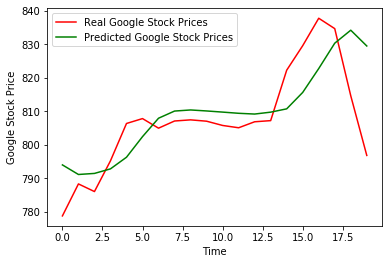

In [37]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Prices')
plt.plot(predicted_stock_price, color='green', label='Predicted Google Stock Prices')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# Model Evaluation

In [26]:
import math
from sklearn.metrics import mean_squared_error

In [27]:
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [36]:
relative_rmse = rmse/(dataset_test['Open'].max() - dataset_test['Open'].min())
relative_rmse

0.1898833254913344